# Bradford assay 기반 단백질 정량

* 작성일: 2025.04.29
* 학과: AI의약바이오
* 학번: 2503110205
* 이름: 김가영

---

## 1. 실험 목적
* Bradford 단백질 정량법을 이용하여 표준 단백질(BSA)로부터 표준 곡선을 작성하고, 이를 바탕으로 미지 시료인 eGFP 용액의 단백질 농도를 계산한다.

<style>
.jp-RenderedHTMLCommon table {
    margin-left:0 !important;
    margin-right: auto !important;
}
</style>

## 2. 실험 재료 
|필요 시약|실험 도구|
|-|-|
|1차 증류수 (DW)|UV/Vis spectrophotometer|
|미지 농도 eGFP (enhanced green fluorescent protein)|cuvette (PMMA)|
|1.4 mg/mL BSA proteins stock|micropipette|
|5x Bradford reagent|micropipette tips|
|-|EP tube|
|-|Vortex|
|-|15ml Conical tube|
|-|Autoclave|
|-|Auto-pipette|
|-|Auto-pipette tips|
|-|ice box|

## 3. 실험 방법
1) 1.4mg/mL BSA proteins stock dilution한다.    
   1mg/mL로 1차 dilution.   
   1mg/mL, 0.5mg/mL, 0.25mg/mL, 0.125mg/mL, 0.0625mg/mL로 serial dilution 한다. (protein은 ice에 놓고 사용)   
2) 5x Bradford reagent를 1x Bradford reagent 10mL로 희석한다.
3) Ep-tube에 990ul의 1x Bradford reagent 첨가 후 10uL의 BSA standard (1 – 0.0625mg/mL)첨가한다.
4) 동시에 Ep-tube에 990uL의 1x Bradford reagent 첨가 후 10ul의 미지 농도의 eGFP 첨가한다.
5) 상온에서 10분동안 incubation한다.
6) PPMA cuvette에 반응용액 1mL를 옮긴다.
7) 595에서 흡광도를 측정한다.
8) BSA standard curve를 그리고 공식에 대입하여 eGFP 미지 농도를 구한다.

## 4. 실험 결과

### 4-1. BSA 표준용액의 농도와 흡광도

In [50]:
import pandas as pd

In [51]:
filepath = 'D:/융합프로젝트/단백질 정량.xlsx'

In [52]:
data =pd.read_excel(filepath)

In [53]:
data

,BSA,Absorbance
0,1.0000,0.392
1,0.5000,0.204
2,0.2500,0.097
3,0.1250,0.026
4,0.0625,0.034
5,0.0000,0.000


### 4-2. BSA 표준 곡선 (Bradford Assay)

In [54]:
import seaborn as sns

In [55]:
x = data['BSA']
y = data['Absorbance']

In [56]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [57]:
mpl.rcParams['font.family'] = 'Malgun Gothic'

In [58]:
import scipy

In [59]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
rsq = (r_value**2)
equation = f'$y={slope:.4f}x + {intercept:.4f}$\n$R^2={rsq:.4f}$'

In [60]:
unknown = 0.297
unknown_conc = (unknown-intercept)/slope

In [61]:
import matplotlib.pyplot as plt

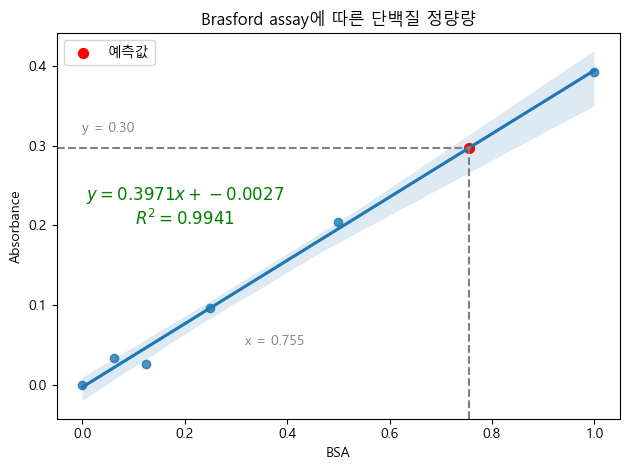

In [81]:
ax = sns.regplot(x=data['BSA'],y=data['Absorbance'])
ax.annotate(
    equation,
    xy=(0.2,0.2),
    ha='center', fontsize=12, color='green'
    )

plt.scatter(unknown_conc, unknown, color='red',s=50, label='예측값')
#plt.axvline(x=unknown_conc, ymax=(unknown - min(y)) / (max(y) - min(y)), linestyle='--', color='gray')
#plt.axhline(y=unknown, xmax=(unknown_conc - min(x)) / (max(x) - min(x)), linestyle='--', color='gray')
vfrac = (unknown - data['Absorbance'].min()) / (data['Absorbance'].max() - data['Absorbance'].min())
hfrac = (unknown_conc - data['BSA'].min()) / (data['BSA'].max() - data['BSA'].min())

plt.axvline(x=unknown_conc, ymin=0, ymax=vfrac-0.05, linestyle='--', color='gray')
plt.axhline(y=unknown, xmin=0, xmax=hfrac-0.02, linestyle='--', color='gray')


plt.text(unknown+0.02, 0.05, f"x = {unknown_conc:.3f}", fontsize=10, color='gray')
#plt.text(unknown+0.02, 0.05, f"x = {unknown_conc}", fontsize=10, color='gray')
plt.text(0.0001, unknown + 0.02, f"y = {unknown:.2f}", fontsize=10, color='gray')

plt.title("Brasford assay에 따른 단백질 정량량")
plt.xlabel("BSA")
plt.ylabel("Absorbance")
plt.legend()
plt.tight_layout()

미지 시료 eGFP의 흡광도 값인 0.297을 공식에 대입하면 미지의 단백질 농도를 구할 수 있다.   

y = 0.3971x – 0.0027   
y = 0.297   
0.297 = 0.3971x – 0.0027   
0.2997 = 0.3971x   
x = 0.755  

## 5. 고찰
* 본 실험에서는 Bradford 단백질 정량법을 이용하여 BSA의 농도에 따른 흡광도를 측정하고, 이를 바탕으로 표준 곡선을 작성한 후 미지 시료(eGFP)의 단백질 농도를 계산함.

### 5-1. 실험 반복 및 신뢰도 문제
* 실험은 총 9회 반복됨.
* 이 중 8회에서 결정계수(R²)가 0.99 미만으로 나타나 신뢰도 있는 데이터를 얻지 못함.
* 반복 실험을 통해 최종적으로 R² = 0.9941의 안정적인 표준 곡선 확보.

### 5-2. 실험 오차 및 원인 분석
* 실험자 간 pipette 사용 미숙으로 인해 오차 발생.
(예: 0.125 mg/mL의 흡광도(0.026)가 0.0625 mg/mL(0.034)보다 낮게 측정됨 → 비정상적인 결과.)
* Bradford 정량법 특성상 단백질 농도가 낮을수록 흡광도도 낮아야 하므로, 이는 명백한 실험 오차로 판단됨.
* 초반 2회의 실험은 조원 4명이 파트를 나누어 각자 진행 → 실험자 간 숙련도 차이로 정확도와 정밀도 저하 발생.

### 5-3. 시료 보관 상태의 영향
* 일부 실험에서 BSA standard를 ice 위에 보관하지 않고 상온에 방치함.
* 단백질은 온도 변화에 민감하여 상온 노출 시 변성 또는 분해 가능성 존재 → 흡광도 값에 영향 미침.
* 마지막 9번째 실험에서는 모든 시료를 ice 위에 보관하고 신속하게 실험을 진행함으로써 안정적인 흡광도 및 높은 R² 획득.

### 5-4. 실험을 통해 얻은 교훈
* 단백질 정량 실험에서 실험자의 일관된 테크닉과 정확한 pipetting이 매우 중요함.
* 단백질 시료는 반드시 적절한 온도에서 보관 및 취급되어야 함.
* 향후 유사한 실험 진행 시 시료의 보관 상태와 실험 정확도에 더욱 주의를 기울일 예정임.